#  Comparison and Benchmark

In this notebook we're going to test and compare the preformance of the three different methods we have to estimate the acceleration: `acceleration_direct`, `acceleration_direct_vectorized` and `acceleration_pyfalcon` . 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fireworks.ic as fic
import fireworks.nbodylib.dynamics as dyn
import pytest
from numpy.random import seed
import time

%matplotlib widget

After importing all the needed packages we define all the quantites requested from the class Particles.

In [2]:
seed(42)
N           = np.arange(2,501,6)
pos_min     = -2
pos_max     = 2
vel_min     = -10
vel_max     = +10
mass_min    = 0
mass_max    = 200

Now it's time to run the three methods in order to collect the requested computational time for each one (for each $N$). 

In [3]:
time_direct             = [] 
time_direct_vectorized  = []  
time_falcon             = []

for i in range(len(N)):
    part    = fic.ic_random_uniform(N[i], pos_min, pos_max, vel_min, vel_max, mass_min, mass_max)

    #acc direct
    t1      = time.perf_counter()
    acc1    = dyn.acceleration_direct(part) 
    t2      = time.perf_counter()
    dt      = t2 - t1
    #print(f"time required to run the acceleration_direct function for N={N[i]}: ", dt)
    time_direct.append(dt)

    #acc vect
    t1      = time.perf_counter()
    acc2    = dyn.acceleration_direct_vectorized(part)
    t2      = time.perf_counter()
    dt      = t2 - t1
    #print(f"time required to run the acceleration_direct_vectorized function for N={N[i]}: ", dt)
    time_direct_vectorized.append(dt)

    #acc pyfalcon
    t1      = time.perf_counter()
    acc3    = dyn.acceleration_pyfalcon(part)
    t2      = time.perf_counter()
    dt      = t2 - t1
    #print(f"time required to run the acceleration_pyfalcon function for N={N[i]}: ", dt)
    #print('')
    time_falcon.append(dt)

#print(time_direct          ) 
#print(time_direct_vectorized)  
#print(time_falcon          )

#part    = fic.ic_random_uniform(N, pos_min, pos_max, vel_min, vel_max, mass_min, mass_max)

/root/miniconda3/lib/python3.10/site-packages/fireworks-0.0.5-py3.10.egg/fireworks/nbodylib/dynamics.py:188: RuntimeWarning: invalid value encountered in divide


### Plots
First we compute three different plots, one for each method, to see how the requested computing time varies internally. 

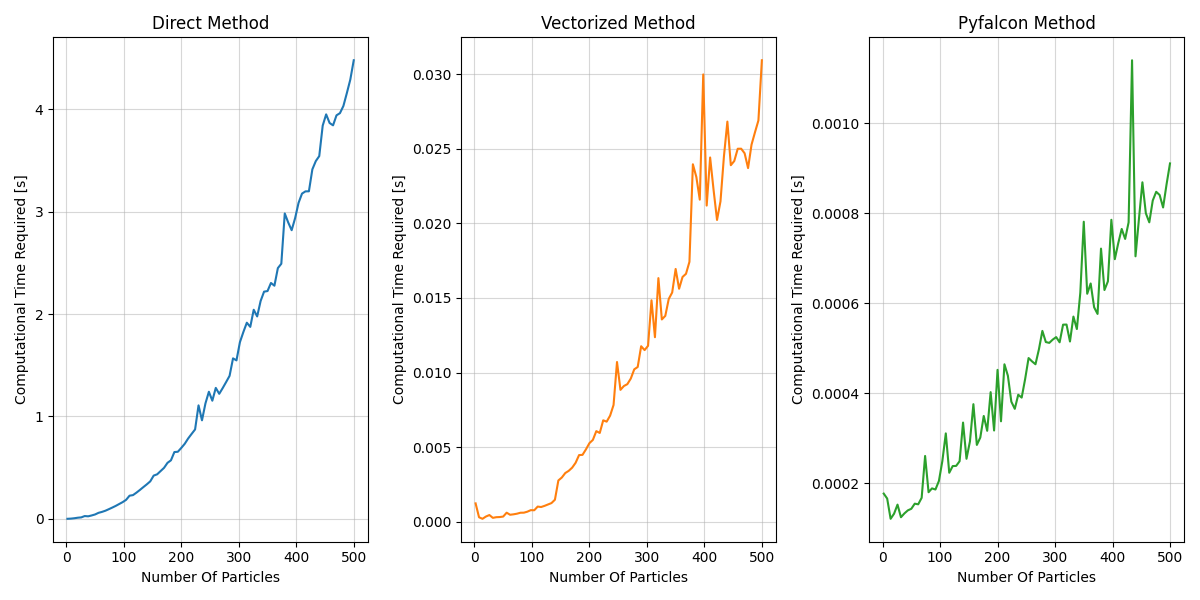

In [6]:
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.title("Direct Method")
plt.plot(N, time_direct)
plt.xlabel('Number Of Particles')
plt.ylabel('Computational Time Required [s]')
plt.grid(True, alpha=0.5)

plt.subplot(1,3,2)
plt.title("Vectorized Method")
plt.plot(N, time_direct_vectorized, c="C1")
plt.xlabel('Number Of Particles')
plt.ylabel('Computational Time Required [s]')
plt.grid(True, alpha=0.5)

plt.subplot(1,3,3)
plt.title("Pyfalcon Method")
plt.plot(N, time_falcon, c="C2")
plt.xlabel('Number Of Particles')
plt.ylabel('Computational Time Required [s]')
plt.grid(True, alpha=0.5)


#plt.xscale("log")
#plt.yscale("log")
plt.tight_layout()
plt.show()


Then we plot again the computational times, but this time in the same plot so that we can get some qualitative information just looking at it. 

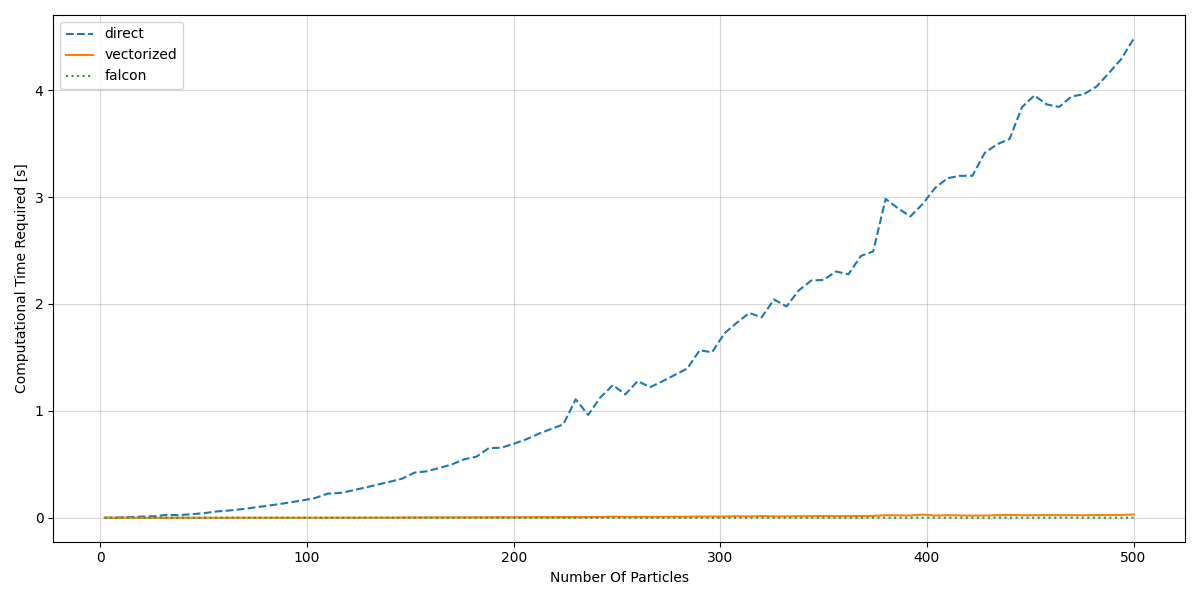

In [7]:
plt.figure(figsize=(12,6))
plt.plot(N, time_direct, label='direct', linestyle='dashed')
plt.plot(N, time_direct_vectorized, label='vectorized')
plt.plot(N, time_falcon, label='falcon', linestyle='dotted')
plt.xlabel('Number Of Particles')
plt.ylabel('Computational Time Required [s]')
plt.legend()
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

### Comments
These results are in line with the theoretical expectations. In fact, while for a low number of particles the three method require almost the same time, as $N_{part}$ increases, $t_{required}$ increases. Naturally, the time required to run the direct method is always higher with respect to the others due to the presence of the for cycles, which are responsible for the exponential increase at large $N$.
Let us now analize the realistic maximum number of particles for each method.
1) for what concernes the direct method, we expect a maximum number for $N$ of the order of $10^3$. From an astrophysical point of view, this is the order of magnitude of the number of particles in an (big) open cluster.
2) regarding the vectorized method, the absence of the for cycles enable us to reach a number of $N$ which is much greater. We are not able to run a simulation for very large $N$ because of the capacity of the computer, but we can assume that this method is useful until $N \approx 10^5$, which is more or less the order of magnitude of the amount of stars in a globular cluster.
3) Finally, the pyfalcon method, in our opinion, can simulate also systems like galaxies, with $N \approx 10^8$; in fact in this case the computational time should be (if we would be able to compute that) way lower than the one coming from the other two methods.

Naturally, if we want to simulate the dynamics of galaxies with $N > 10^{10}$, we should use non-collisional tools, as the Collisionless Boltzmann Equation and the Jeans Equations.